Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 

Произвести расчет как с использованием intercept, так и без.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

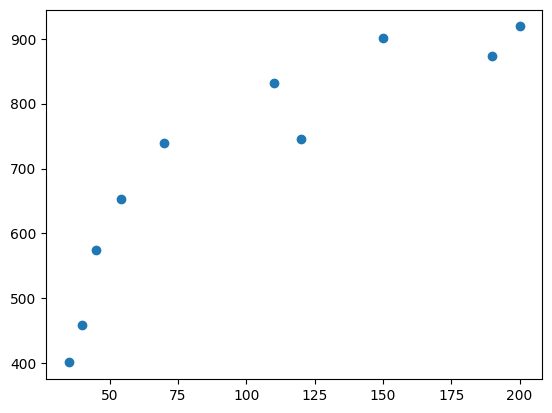

In [39]:
plt.scatter(zp, ks);
# есть линейная взаимосвязь

y = 444.17735732435943 + 2.6205388824027667x


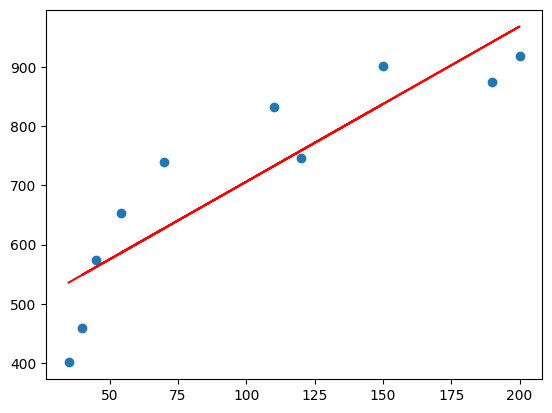

In [53]:
x1 = zp.reshape(-1, 1)
model = LinearRegression()
model.fit(x1, ks)
r = model.score(x1, ks)
b = model.coef_
a = model.intercept_
print(f"y = {a} + {b[0]}x")
plt.plot(x1, a + b * x1, c = 'r');
plt.scatter(zp, ks);

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [84]:
# Градиентный спуск (без вычисления intercept)
def mse(b, x, y):
    return np.sum((b * x - y) ** 2) / len(x)

alpha = 1e-6
b = 0.1
mse_min = mse(b, zp, ks)
i_min = 1
b_min = b

for i in range(3000):
    b -= alpha * (2 / len(zp)) * np.sum((b * zp - ks) * zp)
    if i % 500 == 0:
        print(f'Итерация {i}, b = {b}, mse = {mse(b, zp, ks)}')
    if mse(b, zp, ks) > mse_min:
        print(f' Итерация {i_min}, b = {b_min}, mse = {mse_min},\n Достигнут минимум.')
        break
    else:
        mse_min = mse(b, zp, ks)
        i_min = i
        b_min = b

print(f' Получили b_min = {b_min}')

Итерация 0, b = 0.25952808, mse = 493237.7212546963
Итерация 500, b = 5.889815595583751, mse = 56516.858416040064
 Итерация 628, b = 5.889820285147628, mse = 56516.85841571966,
 Достигнут минимум.
 Получили b_min = 5.889820285147628


Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [87]:
# Градиентный спуск (с вычислением intercept)
def mse_ab(a, b, x, y):
    return np.sum(((a + b * x) - y) ** 2) / len(x)

alpha = 5e-5 # пришлось увеличить в 50 раз, чтобы уложится хотя бы в 1_000_000 итераций
b = 0.1
a = 0.1
mse_ab_min = mse_ab(a, b, zp, ks)
i_min = 1
b_min = b
a_min = a
   
for i in range(1_000_000):
    a -= alpha * 2 * np.sum((a + b * zp) - ks) / len(zp)
    b -= alpha * 2 * np.sum(((a + b * zp) - ks) * zp) / len(zp)
    if i % 100_000 == 0:
        print(f'Итерация {i}, a = {a}, b = {b}, mse = {mse_ab(a, b, zp, ks)}')
    if mse_ab(a, b, zp, ks) > mse_ab_min:
        print(f' Итерация {i_min}, a = {a_min}, b = {b_min}, mse = {mse_ab_min},\n Достигнут минимум:')
        break
    else:
        mse_ab_min = mse_ab(a, b, zp, ks)
        i_min = i
        b_min = b
        a_min = a
print(f' a = {a_min}\n b = {b_min}')

Итерация 0, a = 0.169966, b = 8.074680544760001, mse = 122318.06397097581
Итерация 100000, a = 409.0442373734796, b = 2.879127619051743, mse = 6783.521961452364
Итерация 200000, a = 441.3974680483413, b = 2.6409995775222037, mse = 6472.374468908443
Итерация 300000, a = 443.95740007610897, b = 2.622157823932053, mse = 6470.426473787141
Итерация 400000, a = 444.159953325044, b = 2.6206669802831115, mse = 6470.414278011555
Итерация 500000, a = 444.1759802422447, b = 2.6205490180788695, mse = 6470.414201657699
 Итерация 520164, a = 444.17653163778414, b = 2.62054495966686, mse = 6470.414201349592,
 Достигнут минимум:
 a = 444.17653163778414
 b = 2.62054495966686
